In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import random, randint
from statistics import mode, StatisticsError
from PIL import Image
from io import BytesIO
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

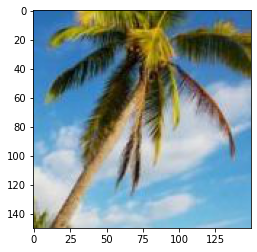

In [2]:
image = Image.open('test.jpg')   # Open Image
plt.imshow(image)

# Grayscale the Given Picture

In [3]:
def turnGray(image):        # takes in image, returns 3D array with grayscale matrix and
    pix = image.load();            # corresponding rgb value in original picture
    height = image.size[1];
    width = image.size[0];
    rgb = np.zeros((height, width, 3));
    gray = np.empty([height, width], dtype=np.uint8);
    for i in range(height):
        for j in range(width):
            rgb[i][j][0] = pix[j, i][0];
            rgb[i][j][1] = pix[j, i][1];
            rgb[i][j][2] = pix[j, i][2];
            gray[i][j] = 0.21*pix[j, i][0] + 0.72*pix[j, i][1] + 0.07*pix[j, i][2]; # grayscale formula
    return rgb, gray
    

In [4]:
rgb, gray = turnGray(image)

rgbtrain = rgb[:, 0:int(rgb.shape[1]/2)];        #set up training and testing datasets
graytrain = gray[:, 0:int(gray.shape[1]/2)];
graytest = gray[:, int(gray.shape[1]/2):gray.shape[1]];
rgbtest = rgb[:, int(rgb.shape[1]/2):rgb.shape[1]];

# Logistic Regression Model

In [5]:
def trainLogistic_bonus(graytrain, rgbtrain, graytest):     # logistic Regression with sklearn library
    k = 0;
    X = np.zeros((graytrain.shape[0] * graytrain.shape[1], 1));
    Y_r = np.zeros((rgbtrain.shape[0] * rgbtrain.shape[1], 1));
    Y_g = np.zeros((rgbtrain.shape[0] * rgbtrain.shape[1], 1));
    Y_b = np.zeros((rgbtrain.shape[0] * rgbtrain.shape[1], 1));
    X_test = np.zeros((graytest.shape[0] * graytest.shape[1], 1));
    for i in range(graytrain.shape[0]):
        for j in range(graytrain.shape[1]):       # Separates training and testing data into 
            X[k] = graytrain[i][j];               # corresponding inputs and outputs
            X_test[k] = graytest[i][j];
            Y_r[k] = rgbtrain[i][j][0];
            Y_g[k] = rgbtrain[i][j][1];
            Y_b[k] = rgbtrain[i][j][2];
            k = k + 1;
            
    X = pd.DataFrame(X, columns=['grayscale']);
    X_test = pd.DataFrame(X_test, columns=['grayscale']);
    Y_r = pd.DataFrame(Y_r, columns=['red']);
    Y_g = pd.DataFrame(Y_g, columns=['green']);
    Y_b = pd.DataFrame(Y_b, columns=['blue']);
    rgbtemp = np.zeros((graytest.shape[0], graytest.shape[1], 3));
    
    reg = LogisticRegression(random_state = 0).fit(X, Y_r);    # Use library's logistic regression to build model
    Y_test_r = reg.predict(X_test);                            # Use model to predict value
    reg = LogisticRegression(random_state = 0).fit(X, Y_g);
    Y_test_g = reg.predict(X_test);
    reg = LogisticRegression(random_state = 0).fit(X, Y_b);    # Requires 3 models, one for each color
    Y_test_b = reg.predict(X_test);

    k = 0;
    for i in range(rgbtemp.shape[0]):     
        for j in range(rgbtemp.shape[1]):
            rgbtemp[i][j][0] = Y_test_r[k];       # combine three predictions to make 1 (r, g, b) vector
            rgbtemp[i][j][1] = Y_test_g[k];
            rgbtemp[i][j][2] = Y_test_b[k];
            k = k + 1;
            
    return rgbtemp

C:\Users\chris\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chris\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

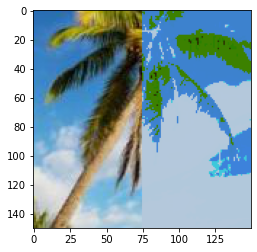

In [6]:
rgbtemp = trainLogistic_bonus(graytrain, rgbtrain, graytest);

rgbfinal = rgb.copy();             # change the right side of original image to reflect predictions
for i in range(gray.shape[0]):
    for j in range(int(gray.shape[1]/2), gray.shape[1]):
        rgbfinal[i][j][0] = rgbtemp[i][j - int(gray.shape[1]/2)][0];
        rgbfinal[i][j][1] = rgbtemp[i][j - int(gray.shape[1]/2)][1];
        rgbfinal[i][j][2] = rgbtemp[i][j - int(gray.shape[1]/2)][2];

data = rgbfinal.astype('uint8');
plt.imshow(data);

# Loss and MSE Calculations For Logistic Model

In [7]:
loss_final = np.zeros((3));

for i in range(rgbtemp.shape[0]):
    for j in range(rgbtemp.shape[1]):
        loss_final[0] = loss_final[0] + math.pow(rgbtemp[i][j][0] - rgbtest[i][j][0], 2);
        loss_final[1] = loss_final[1] + math.pow(rgbtemp[i][j][1] - rgbtest[i][j][1], 2);
        loss_final[2] = loss_final[2] + math.pow(rgbtemp[i][j][2] - rgbtest[i][j][2], 2);

loss_final

array([22540776., 13250299., 56598546.])

In [1]:
n = rgbtest.shape[0]*rgbtest.shape[1]      # Calculates MSE
print("MSE - R: " + str(loss_final[0]/n) + ", G: " + str(loss_final[1]/n) + ", B: " + str(loss_final[2]/n))

MSE - R: 2003.6245333333334, G: 1177.8043555555555, B: 5030.981866666667


# Ordinary Least Squares Model

In [8]:
def trainOLS_bonus(graytrain, rgbtrain, graytest):        # logistic Regression with sklearn library
    k = 0;
    X = np.zeros((graytrain.shape[0] * graytrain.shape[1], 1));
    Y_r = np.zeros((rgbtrain.shape[0] * rgbtrain.shape[1], 1));
    Y_g = np.zeros((rgbtrain.shape[0] * rgbtrain.shape[1], 1));
    Y_b = np.zeros((rgbtrain.shape[0] * rgbtrain.shape[1], 1));
    X_test = np.zeros((graytest.shape[0] * graytest.shape[1], 1));
    for i in range(graytrain.shape[0]):
        for j in range(graytrain.shape[1]):          # Separates training and testing data into 
            X[k] = graytrain[i][j];                  # corresponding inputs and outputs
            X_test[k] = graytest[i][j];
            Y_r[k] = rgbtrain[i][j][0];
            Y_g[k] = rgbtrain[i][j][1];
            Y_b[k] = rgbtrain[i][j][2];
            k = k + 1;
            
    X = pd.DataFrame(X, columns=['grayscale']);
    X_test = pd.DataFrame(X_test, columns=['grayscale']);
    Y_r = pd.DataFrame(Y_r, columns=['red']);
    Y_g = pd.DataFrame(Y_g, columns=['green']);
    Y_b = pd.DataFrame(Y_b, columns=['blue']);
    rgbtemp = np.zeros((graytest.shape[0], graytest.shape[1], 3));
    
    reg = LinearRegression().fit(X, Y_r);            # Use library's logistic regression to build model
    Y_test_r = reg.predict(X_test);                  # Use model to predict value 
    reg = LinearRegression().fit(X, Y_g);
    Y_test_g = reg.predict(X_test);
    reg = LinearRegression().fit(X, Y_b);            # Requires 3 models, one for each color
    Y_test_b = reg.predict(X_test);

    k = 0;
    for i in range(rgbtemp.shape[0]):
        for j in range(rgbtemp.shape[1]):
            rgbtemp[i][j][0] = Y_test_r[k];          # combine three predictions to make 1 (r, g, b) vector
            rgbtemp[i][j][1] = Y_test_g[k];
            rgbtemp[i][j][2] = Y_test_b[k];
            k = k + 1;
            
    return rgbtemp

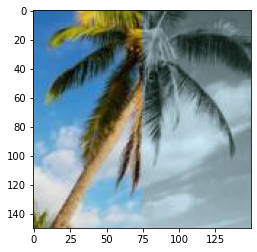

In [9]:
rgbtemp = trainOLS_bonus(graytrain, rgbtrain, graytest);

rgbfinal = rgb.copy();
for i in range(gray.shape[0]):
    for j in range(int(gray.shape[1]/2), gray.shape[1]):
        rgbfinal[i][j][0] = rgbtemp[i][j - int(gray.shape[1]/2)][0];
        rgbfinal[i][j][1] = rgbtemp[i][j - int(gray.shape[1]/2)][1];
        rgbfinal[i][j][2] = rgbtemp[i][j - int(gray.shape[1]/2)][2];

data = rgbfinal.astype('uint8');
plt.imshow(data);

# Loss and MSE Calculations for OLS Model

In [10]:
loss_final = np.zeros((3));

for i in range(rgbtemp.shape[0]):               # change the right side of original image to reflect predictions
    for j in range(rgbtemp.shape[1]):
        loss_final[0] = loss_final[0] + math.pow(rgbtemp[i][j][0] - rgbtest[i][j][0], 2);
        loss_final[1] = loss_final[1] + math.pow(rgbtemp[i][j][1] - rgbtest[i][j][1], 2);
        loss_final[2] = loss_final[2] + math.pow(rgbtemp[i][j][2] - rgbtest[i][j][2], 2);

loss_final

array([ 9151179.79099618,   294662.67789586, 22713624.5523781 ])

In [2]:
n = rgbtest.shape[0]*rgbtest.shape[1]      # Calculates MSE
print("MSE - R: " + str(loss_final[0]/n) + ", G: " + str(loss_final[1]/n) + ", B: " + str(loss_final[2]/n))

MSE - R: 813.438203644105, G: 26.192238035187554, B: 2018.9888491002755
